# Building your first model: naive Bayes

## Challenge: Iterate and evaluate your classifier
by: Melissa N 

Data: [dataset of sentiment labelled sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## AMAZON CLASSIFIER  

The data is a text file that contains review that were taken Amazon. In it we have the customer comment or review on the product they purchased. And also their grade of  say product, which is either 1 for good (liked product) or 0 for bad (disliked product). 

In [2]:
# Grab and process the raw data for amazon.
data_1 = open("amazon_cells_labelled.txt")

df_a = pd.read_csv(data_1, delimiter= '\t', header=None)
df_a.columns = ['review', 'sentiment']


In [3]:
#Make everything lower case...

df_a['review'] = df_a['review'].str.lower()

#Remove punctuation...

df_a['review'] = df_a['review'].str.replace(r'\.|\!|\?|\'|,|-|\(|\)', "",)

After making all the words in our data lower case and removing the punctuation to make it easier to see what words are in the good reviewss.  
We will then pick out the words we believe will make it easier to be able to predict the good reviews.   

In [4]:
display(df_a['review'][df_a['sentiment']==1].head(10))

1                             good case excellent value
2                                 great for the jawbone
4                                      the mic is great
7               if you are razr owneryou must have this
10                       and the sound quality is great
11    he was very impressed when going from the orig...
13                             very good quality though
15    highly recommend for any one who has a blue to...
17                                       so far so good
18                                          works great
Name: review, dtype: object

Let's Find the Good review meaning the ones with sentiment = 0.
This mean we will create a file for our model that will contain some words that we believe are usually found in good reviews.

In [5]:
keywords_a = ['great', 'good', 'excellent', 'awesome', 'recommend', 'fast', 'love', 'nice','well','ideal','highly','must have','loved','beautiful','super' ]

for key in keywords_a:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_a[str(key)] = df_a.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [6]:
sorted(keywords_a)

['awesome',
 'beautiful',
 'excellent',
 'fast',
 'good',
 'great',
 'highly',
 'ideal',
 'love',
 'loved',
 'must have',
 'nice',
 'recommend',
 'super',
 'well']

In [7]:
display(df_a.head())

,review,sentiment,great,good,excellent,awesome,recommend,fast,love,nice,well,ideal,highly,must have,loved,beautiful,super
0,so there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,good case excellent value,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,great for the jawbone,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,the mic is great,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df_a['sentiment'] = (df_a['sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [9]:
display(df_a.head())

,review,sentiment,great,good,excellent,awesome,recommend,fast,love,nice,well,ideal,highly,must have,loved,beautiful,super
0,so there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,good case excellent value,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,great for the jawbone,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,the mic is great,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


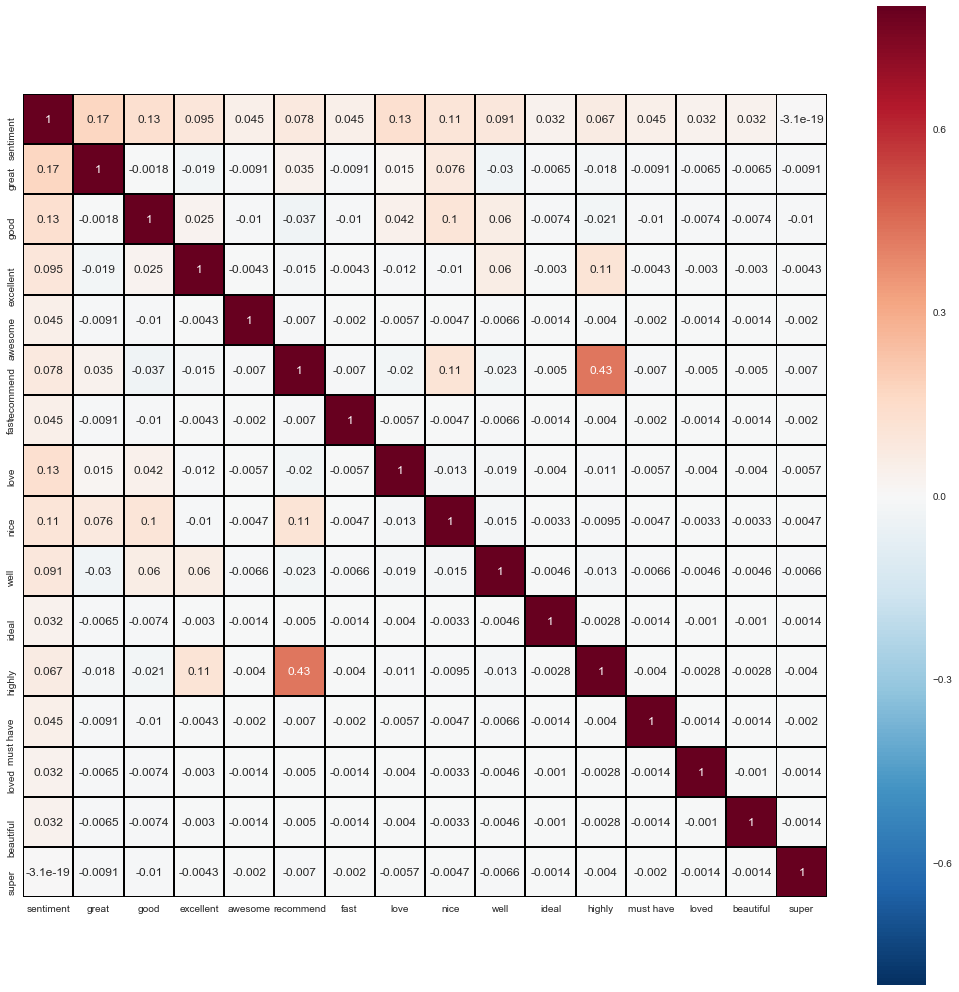

In [10]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_a.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

Looking at the correlation matrix,   
 
During our iteration, we had the feature "highly" in but 

We see that the correlation between "highly" and "recommend" is 0.43. This mean that in many of the reviews that have recommend, they also for the most part contain the term highly. This makes sense since people will usually write that they "highly recommed" a produt if they like it. 


We see that the correlation between "highly" and "excellent" is 0.12. This mean that in many of the reviews that the word "highly" in it, we can also find the word "excellent".

This is why at the end we removed "Highly". 

We see that the correlation between sentiment and "super" is -3.1e-19. This is so small that is not a correlation.   

This is why at the end we removed "Super".


The features with a high correlation with the outcome were "great", "love", "good" and "nice".  
If we see a review with those words in it, there is high likely hood that the review is a good review.  

In [11]:
data = df_a[keywords_a]
target = df_a['sentiment']

In [12]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 387


In [13]:

# Calculating accuracy
(target == y_pred).sum() / data.shape[0] * 100

61.299999999999997

61.29% off of 613 correctly classified messages and 387 incorrectly classified.

In [14]:

# importing confusion matrix to see where we were right and where we were wrong
from sklearn.metrics import confusion_matrix
C = confusion_matrix(target, y_pred)
display(C)


print('{} is the True Negative'.format(C[0,0]))
print('{} is the True Positive'.format(C[1,1]))
print('{} is the False Negative'.format(C[1,0]))
print('{} is the False Positive'.format(C[0,1]))

array([[474,  26],
       [361, 139]])

474 is the True Negative
139 is the True Positive
361 is the False Negative
26 is the False Positive


In [15]:
from sklearn.metrics import classification_report
print(classification_report(target, y_pred))

             precision    recall  f1-score   support

      False       0.57      0.95      0.71       500
       True       0.84      0.28      0.42       500

avg / total       0.71      0.61      0.56      1000



For our model:

__Sensitivity__ is the percentage of positives correctly identified, in our case 139/500 or 28%.    
Our model is not as good as we would like it to be to identified good reviews.   

__Specificity__ is just the opposite, the percentage of negatives correctly identified, 474/500 or 95%.   
Our model is very good at identified the bad reviews.   

## Iteration 0
 __keywords_a__ = ['great', 'good', 'excellent', 'awesome', 'recommend', 'fast', 'love', 'nice','well','ideal',
                    'highly','must have','love','beautiful','super' ]       
               
                   
__Confusion matrix__   

474 is the True Negative    
139 is the True Positive    
361 is the False Negative    
26 is the False Positive     


For our model:

__Sensitivity__ is the percentage of positives correctly identified, in our case 139/500 or 28%.    
Our model is not as good as we would like it to be to identified good reviews.   

__Specificity__ is just the opposite, the percentage of negatives correctly identified, 474/500 or 95%.   
Our model is very good at identified the bad reviews.   


## Iteration 1 

__keywords_a__  = ['great', 'good', 'excellent', 'awesome', 'recommend', 'fast', 'love', 'nice','well','ideal', 
                     'must have','love','beautiful', 'best', 'better', 'easy' ]   
                     
__Confusion matrix__                          
                   
470 is the True Negative     
160 is the True Positive     
340 is the False Negative     
30 is the False Positive 

For our model:

__Sensitivity__ is the percentage of positives correctly identified, in our case 160/500 or 32%.    
Our model is not as good as we would like it to be to identified good reviews.   

__Specificity__ is just the opposite, the percentage of negatives correctly identified, 470/500 or 94%.   
Our model is very good at identified the bad reviews.  


## Iteration 2    

__keywords_a__ = ['great', 'good', 'excellent', 'awesome', 'fast', 'love', 'nice','must have','loved', 'best' ]   


__Confusion matrix__    


483 is the True Negative     
123 is the True Positive     
377 is the False Negative      
17 is the False Positive     



## Iteration 3   

__keywords_a__ = ['great', 'good', 'excellent', 'awesome', 'fast', 'love', 'highly recommend', 'must have']    


__Confusion matrix__    

485 is the True Negative      
109 is the True Positive      
391 is the False Negative     
15 is the False Positive     


For our model:

__Sensitivity__ is the percentage of positives correctly identified, in our case 109/500 or 22%.    
Our model is not as good as we would like it to be to identified good reviews.   

__Specificity__ is just the opposite, the percentage of negatives correctly identified, 485/500 or 97%.   
Our model is very good at identified the bad reviews.     

## Iteration 4    

__keywords_a__ = ['great','good', 'fast' , 'awesome', 'highly recommend', 'must have','very', 'perfectly',                                  'easy','happy','like', 'clear','comfortable', 'pleased']       


__Confusion matrix__     

448 is the True Negative     
174 is the True Positive     
326 is the False Negative      
52 is the False Positive    


For our model:

__Sensitivity__ is the percentage of positives correctly identified, in our case 174/500 or 35%.    
Our model is not as good as we would like it to be to identified good reviews.   

__Specificity__ is just the opposite, the percentage of negatives correctly identified, 448/500 or 90%.   
Our model is very good at identified the bad reviews.   

                 

### Do any of your classifiers seem to overfit?    

None seem to overfit 


### Which seem to perform the best? Why?     

In order to figure out which works the best, in this particular problem we will consider the iteration that has the greatest amount of __True Positive__ and reduce the most __False Negative__.   

This is why I believe __Iteration 4__ is the best because it is the one that has more True Positive (174) and less False Negative (326). 



### Which features seemed to be most impactful to performance?      

The features: "great", "good", "very"